Authors:    Leone, Riccardo (RL)

Notes:     
- Find the best ws_diconnn range

Comments:
- Disconnectivity matrices derived using Lesion Quantification Toolkit in R (https://github.com/jdwor/LQT)

Sources: 

Last edit:  2023-12-13

In [7]:
# Imports
import matplotlib.pyplot as plt
from petTOAD_load import *

In [8]:
sc = load_norm_aal_sc()

In [9]:
def plot_weights_disconnectome(list_pt, ax, ws):
    for subj in list_pt:
        sdc = get_sc_wmh_weighted(subj, is_random=False)
        disc_sc = [np.clip(sc + (sdc * w), 0, 1) for w in ws]
        d_sc = []
        for i in range(1, len(disc_sc)):
            d_sc.append(np.mean(disc_sc[i] - disc_sc[i-1]))
        d_sc.append(0)
        ax.plot(ws, d_sc)

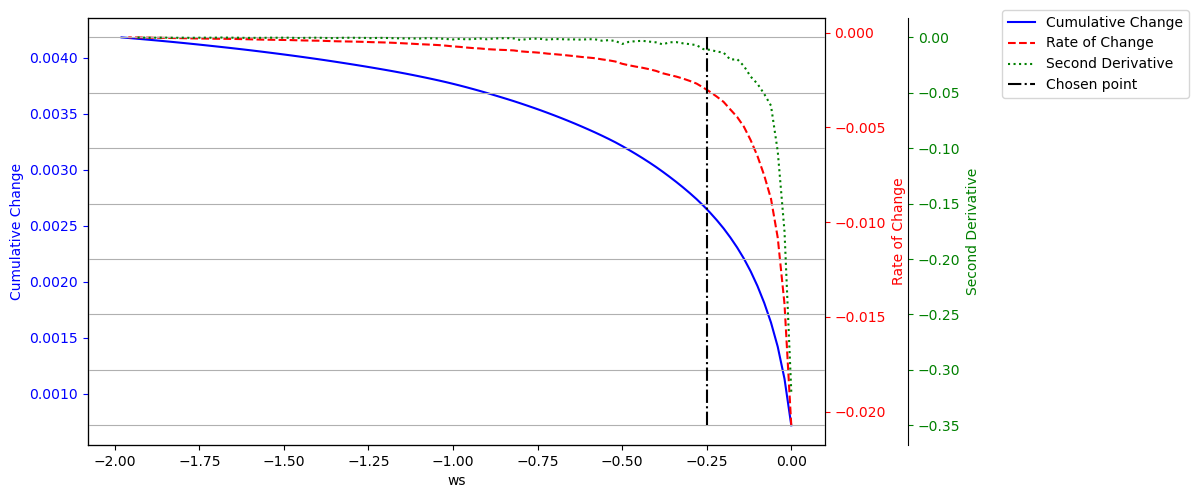

In [14]:
# Load the clinical df
df_petTOAD = pd.read_csv(RES_DIR / "df_petTOAD.csv", index_col = 0)
# Get list of patients in each WMH group
list_cn_wmh = df_petTOAD[df_petTOAD["Group_bin_Fazekas"] == "CN_WMH"]["PTID"].to_list()
list_mci_wmh = df_petTOAD[df_petTOAD["Group_bin_Fazekas"] == "MCI_WMH"]["PTID"].to_list()
list_all = list_cn_wmh + list_mci_wmh
ws_disconn = np.linspace(0, -2, 101)
def plot_cum_sum(group, list_pt, ax1, ws):
    cum_sums = []
    for subj in list_pt:
        sdc = get_sc_wmh_weighted(subj, is_random=False)
        disc_sc = [np.clip(sc + (sdc * w), 0, 1) for w in ws]
        d_sc = []
        for i in range(1, len(disc_sc)):
            d_sc.append(np.abs(np.mean(disc_sc[i] - disc_sc[i-1])))
        cum_sums.append(np.cumsum(d_sc))
    
    x = ws[:-1]
    y = np.mean(cum_sums, axis = 0)
    rate_of_change = np.diff(y) / np.diff(x)
    # Calculate the second derivative
    second_derivative = np.diff(rate_of_change) / np.diff(x[:-1])
    # Plot the original line on the left y-axis
    ax1.plot(x, y, label="Cumulative Change", color="blue")
    ax1.set_xlabel("ws")
    ax1.set_ylabel("Cumulative Change", color="blue")
    ax1.tick_params("y", colors="blue")
    # Create a twin y-axis on the right side for the rate of change
    ax2 = ax1.twinx()
    ax2.plot(x[:-1], rate_of_change, label="Rate of Change", linestyle="dashed", color="red")
    ax2.set_ylabel("Rate of Change", color="red")
    ax2.tick_params("y", colors="red")    
    # Create a second twin y-axis for the second derivative
    ax3 = ax1.twinx()
    ax3.spines['right'].set_position(('outward', 60))
    ax3.plot(x[:-2], second_derivative, label='Second Derivative', linestyle='dotted', color='green')
    ax3.set_ylabel('Second Derivative', color='green')
    ax3.tick_params('y', colors='green')

    # Add a legend
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    #ax2.legend(lines + lines2, labels + labels2, loc="lower left")
    lines3, labels3 = ax3.get_legend_handles_labels()
    ax3.plot(np.ones(100) * -0.25, np.linspace(-0.35, 0, 100), color = "black", linestyle="dashdot", label = "Chosen point")
    #ax3.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='upper left')
    plt.grid(True)
    return rate_of_change

fig, ax = plt.subplots(1, 1, figsize = (10, 5))
der = plot_cum_sum("all", list_all, ax, ws_disconn)
fig.legend(loc="upper left", bbox_to_anchor=(1.0, 1.0))
fig.tight_layout()